In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD
import seaborn as sns
import matplotlib.pyplot as plt

Layer 1

In [2]:
class Layer1(nn.Module):
    def __init__(self):
        super().__init__()
        self.w00, self.b00 = nn.Parameter(torch.tensor(0.6)), nn.Parameter(torch.tensor(0.1))
        self.w01, self.b01 = nn.Parameter(torch.tensor(0.9)), nn.Parameter(torch.tensor(-0.15))
        self.w02, self.b02 = nn.Parameter(torch.tensor(-0.25)), nn.Parameter(torch.tensor(0.08))

    def forward(self, x):
        z1 = x * self.w00 + self.b00
        z2 = x * self.w01 + self.b01
        z3 = x * self.w02 + self.b02
        y1 = F.relu(z1)
        y2 = F.relu(z2)
        y3 = F.relu(z3)
        combined = y1 + y2 + y3
        return combined

Layer 2

In [3]:
class Layer2(nn.Module):
    def __init__(self):
        super().__init__()
        self.w10, self.b10 = nn.Parameter(torch.tensor(0.45)), nn.Parameter(torch.tensor(0.07))
        self.w11, self.b11 = nn.Parameter(torch.tensor(-0.55)), nn.Parameter(torch.tensor(0.12))

    def forward(self, x):
        z4 = x * self.w10 + self.b10
        z5 = x * self.w11 + self.b11
        y4 = torch.sigmoid(z4)
        y5 = torch.sigmoid(z5)
        combined = y4 + y5
        return combined

Combine + Tanh

In [4]:
class CombineTanh(nn.Module):
    def forward(self, x):
        return torch.tanh(x)

Output Layer

In [5]:
class OutputLayer(nn.Module):
    def __init__(self):
        super().__init__()
        self.w20, self.b20 = nn.Parameter(torch.tensor(0.35)), nn.Parameter(torch.tensor(0.05))

    def forward(self, x):
        return x * self.w20 + self.b20

Full Network

In [6]:
class CustomNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = Layer1()
        self.layer2 = Layer2()
        self.comb_tanh = CombineTanh()
        self.output_layer = OutputLayer()

    def forward(self, x):
        out1 = self.layer1(x)
        out2 = self.layer2(out1)
        out3 = self.comb_tanh(out2)
        output = self.output_layer(out3)
        return output

In [8]:
CustomNN_model = CustomNN()

Input

In [11]:
x_train = torch.linspace(start=1, end=2.5, steps=40)
x_train

tensor([1.0000, 1.0385, 1.0769, 1.1154, 1.1538, 1.1923, 1.2308, 1.2692, 1.3077,
        1.3462, 1.3846, 1.4231, 1.4615, 1.5000, 1.5385, 1.5769, 1.6154, 1.6538,
        1.6923, 1.7308, 1.7692, 1.8077, 1.8462, 1.8846, 1.9231, 1.9615, 2.0000,
        2.0385, 2.0769, 2.1154, 2.1538, 2.1923, 2.2308, 2.2692, 2.3077, 2.3462,
        2.3846, 2.4231, 2.4615, 2.5000])

True Outputs

In [ ]:
y_train = torch.tensor([
    1.5702, 1.5750, 1.5790, 1.5824, 1.5853, 1.5877, 1.5897, 1.5914, 1.5928,
    1.5939, 1.5949, 1.5958, 1.5965, 1.5970, 1.5975, 1.5979, 1.5983, 1.5985,
    1.5988, 1.5990, 1.5991, 1.5993, 1.5994, 1.5995, 1.5996, 1.5996, 1.5997,
    1.5998, 1.5998, 1.5998, 1.5999, 1.5999, 1.5999, 1.5999, 1.5999, 1.5999,
    1.6000, 1.6000, 1.6000, 1.6000])

Visualization (True)

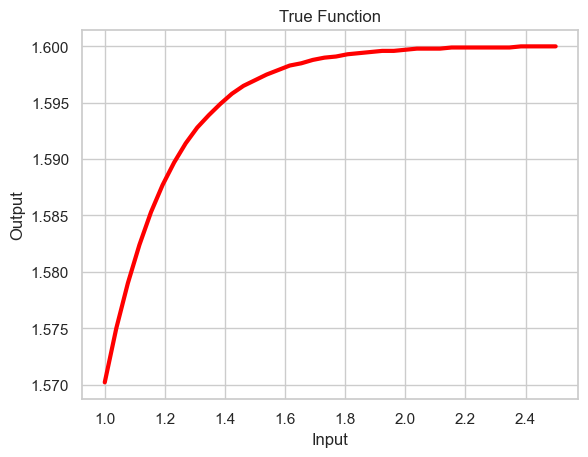

In [13]:
sns.set(style="whitegrid")
sns.lineplot(x=x_train, y=y_train, color='red', linewidth=3)
plt.ylabel('Output')
plt.xlabel('Input')
plt.title('True Function')
plt.show()

Before Training

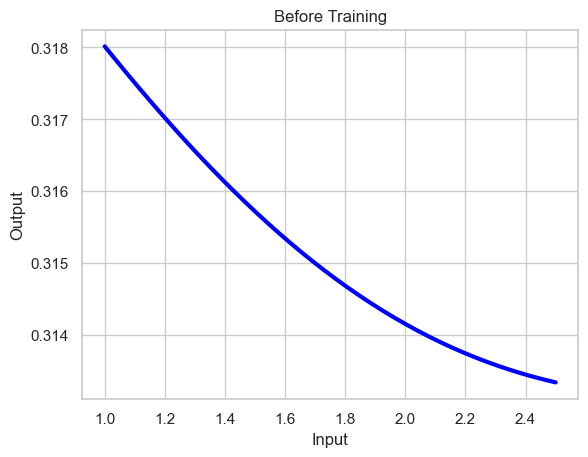

In [15]:
pred_outputs = CustomNN_model(x_train)
sns.lineplot(x=x_train, y=pred_outputs.detach(), color='blue', linewidth=3)
plt.ylabel('Output')
plt.xlabel('Input')
plt.title('Before Training')
plt.show()

Training

In [19]:
optimizer = SGD(CustomNN_model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

In [23]:
for epoch in range(500):
    total_loss = 0.0
    
    for i in range(len(x_train)):
        input_i = x_train[i]
        true_output_i = y_train[i]

        pred_output_i = CustomNN_model(input_i)
        loss_value = loss_fn(pred_output_i, true_output_i)
        loss_value.backward()
        total_loss += loss_value.item()

    optimizer.step()
    optimizer.zero_grad()
    
    print(f"Epoch {epoch} | Total Loss: {total_loss:.6f}", flush=True)


Epoch 0 | Total Loss: 0.000486


Epoch 1 | Total Loss: 0.000486
Epoch 2 | Total Loss: 0.000486
Epoch 3 | Total Loss: 0.000485
Epoch 4 | Total Loss: 0.000485
Epoch 5 | Total Loss: 0.000485
Epoch 6 | Total Loss: 0.000485
Epoch 7 | Total Loss: 0.000485
Epoch 8 | Total Loss: 0.000485
Epoch 9 | Total Loss: 0.000484
Epoch 10 | Total Loss: 0.000484
Epoch 11 | Total Loss: 0.000484
Epoch 12 | Total Loss: 0.000484
Epoch 13 | Total Loss: 0.000484
Epoch 14 | Total Loss: 0.000484
Epoch 15 | Total Loss: 0.000483
Epoch 16 | Total Loss: 0.000483
Epoch 17 | Total Loss: 0.000483
Epoch 18 | Total Loss: 0.000483
Epoch 19 | Total Loss: 0.000483
Epoch 20 | Total Loss: 0.000483
Epoch 21 | Total Loss: 0.000482
Epoch 22 | Total Loss: 0.000482
Epoch 23 | Total Loss: 0.000482
Epoch 24 | Total Loss: 0.000482
Epoch 25 | Total Loss: 0.000482
Epoch 26 | Total Loss: 0.000482
Epoch 27 | Total Loss: 0.000481
Epoch 28 | Total Loss: 0.000481
Epoch 29 | Total Loss: 0.000481
Epoch 30 | Total Loss: 0.000481
Epoch 31 | Total Loss: 0.000481
Epoch 32 | Total 

After Training

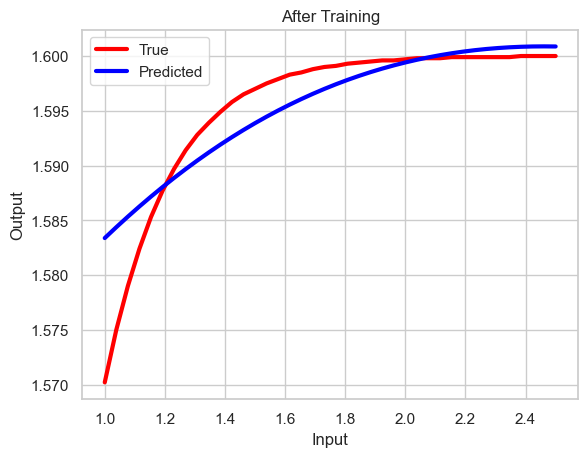

In [ ]:
pred_outputs = CustomNN_model(x_train)
sns.lineplot(x=x_train, y=y_train, color='red', label='True', linewidth=3)
sns.lineplot(x=x_train, y=pred_outputs.detach(), color='blue', label='Predicted', linewidth=3)
plt.ylabel('Output')
plt.xlabel('Input')
plt.title('After Training')
plt.legend()
plt.show()